In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')
data_copy['market_value'] = data_copy.ftse

In [3]:
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

In [5]:
data_copy['returns'] = data_copy.market_value.pct_change(1)*100

In [8]:
arima_model_1_1_1 = ARIMA(data_copy.market_value,order = (1,1,1))
arima_model_1_1_1_fit = arima_model_1_1_1.fit()
arima_model_1_1_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.643
Method:                       css-mle   S.D. of innovations             58.269
Date:                Wed, 05 Aug 2020   AIC                          68843.285
Time:                        10:13:24   BIC                          68870.263
Sample:                    01-10-1994   HQIC                         68852.633
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6751      0.581      1.162      0.245      -0.463       1.814
ar.L1.D.market_value     0.8355      0.078     10.777      0.000       0.684       0.987
ma.L1.D.market_value    -0.8701      0.070    -12.463      0.000      -1.007      -0.733
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1969           +0.0000j            1.1969            0.0000
MA.1            1.1492           +0.0000j            1.1492            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
data_copy['residual'] = arima_model_1_1_1_fit.resid

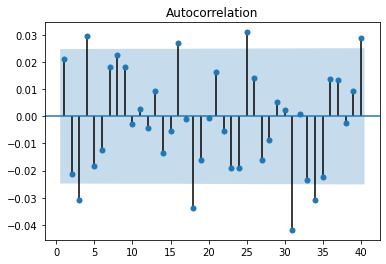

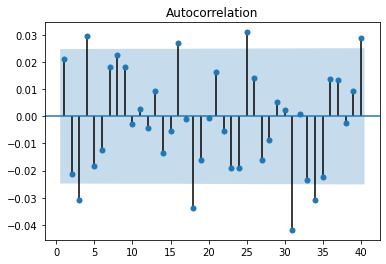

In [14]:
sgt.plot_acf(data_copy.residual[1:],zero = False,lags = 40)

### Fitting higher lag ARIMA models

In [15]:
arima_model_1_1_2 = ARIMA(data_copy.market_value,order = (1,1,2))
arima_model_1_1_2_fit = arima_model_1_1_2.fit()
#arima_model_1_1_1_fit.summary()
arima_model_1_1_3 = ARIMA(data_copy.market_value,order = (1,1,3))
arima_model_1_1_3_fit = arima_model_1_1_3.fit()
arima_model_2_1_1 = ARIMA(data_copy.market_value,order = (2,1,1))
arima_model_2_1_1_fit = arima_model_2_1_1.fit()
arima_model_3_1_1 = ARIMA(data_copy.market_value,order = (3,1,1))
arima_model_3_1_1_fit = arima_model_3_1_1.fit()
arima_model_3_1_2 = ARIMA(data_copy.market_value,order = (3,1,2))
arima_model_3_1_2_fit = arima_model_3_1_2.fit(start_ar_lags = 5)

In [16]:
print('ARIMA(1,1,1) LLR = ',arima_model_1_1_1_fit.llf,"AIC = ",arima_model_1_1_1_fit.aic)
print('ARIMA(1,1,2) LLR = ',arima_model_1_1_2_fit.llf,"AIC = ",arima_model_1_1_2_fit.aic)
print('ARIMA(1,1,3) LLR = ',arima_model_1_1_3_fit.llf,"AIC = ",arima_model_1_1_3_fit.aic)
print('ARIMA(2,1,1) LLR = ',arima_model_2_1_1_fit.llf,"AIC = ",arima_model_2_1_1_fit.aic)
print('ARIMA(3,1,1) LLR = ',arima_model_3_1_1_fit.llf,"AIC = ",arima_model_3_1_1_fit.aic)
print('ARIMA(3,1,2) LLR = ',arima_model_3_1_2_fit.llf,"AIC = ",arima_model_3_1_2_fit.aic)

ARIMA(1,1,1) LLR =  -34417.64256895482 AIC =  68843.28513790964
ARIMA(1,1,2) LLR =  -34413.6633171684 AIC =  68837.3266343368
ARIMA(1,1,3) LLR =  -34410.78126377603 AIC =  68833.56252755206
ARIMA(2,1,1) LLR =  -34413.518374977095 AIC =  68837.03674995419
ARIMA(3,1,1) LLR =  -34412.28349443462 AIC =  68836.56698886924
ARIMA(3,1,2) LLR =  -34410.795902261976 AIC =  68835.59180452395


model (1,1,3) has low AIC and high LLR value

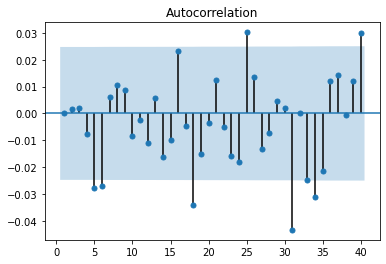

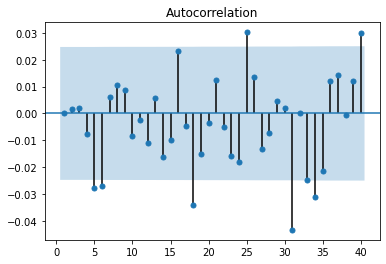

In [17]:
data_copy['residual'] = arima_model_1_1_3_fit.resid
sgt.plot_acf(data_copy.residual[1:],zero = False,lags = 40)

In [19]:
arima_model_5_1_1 = ARIMA(data_copy.market_value,order = (5,1,1))
arima_model_5_1_1_fit = arima_model_5_1_1.fit()


In [20]:
data_copy['arima_511_residuals'] = arima_model_5_1_1_fit.resid

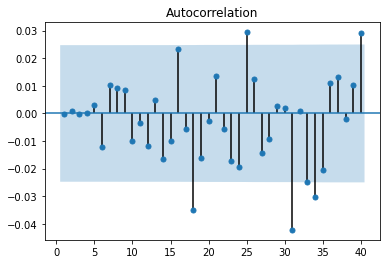

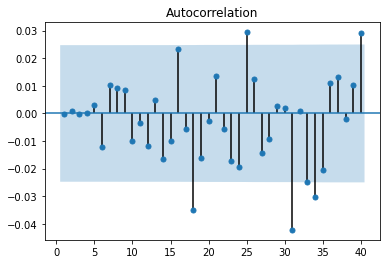

In [21]:
sgt.plot_acf(data_copy.arima_511_residuals[1:],zero = False,lags = 40)